13. In this exercise you will create some simulated data and will fit simple linear regression models to it. 
Make sure to use `set.seed(1)` prior to starting part (a) to ensure consistent results.


In [21]:
set.seed(1)

In [16]:
library(ggplot2)

(a) Using the `rnorm()` function, create a vector, `x`, containing 100 observations drawn from a $N(0,1)$ distribution. 
This represents a feature, $X$.

In [45]:
x <- rnorm(100, mean = 0, sd = 1)

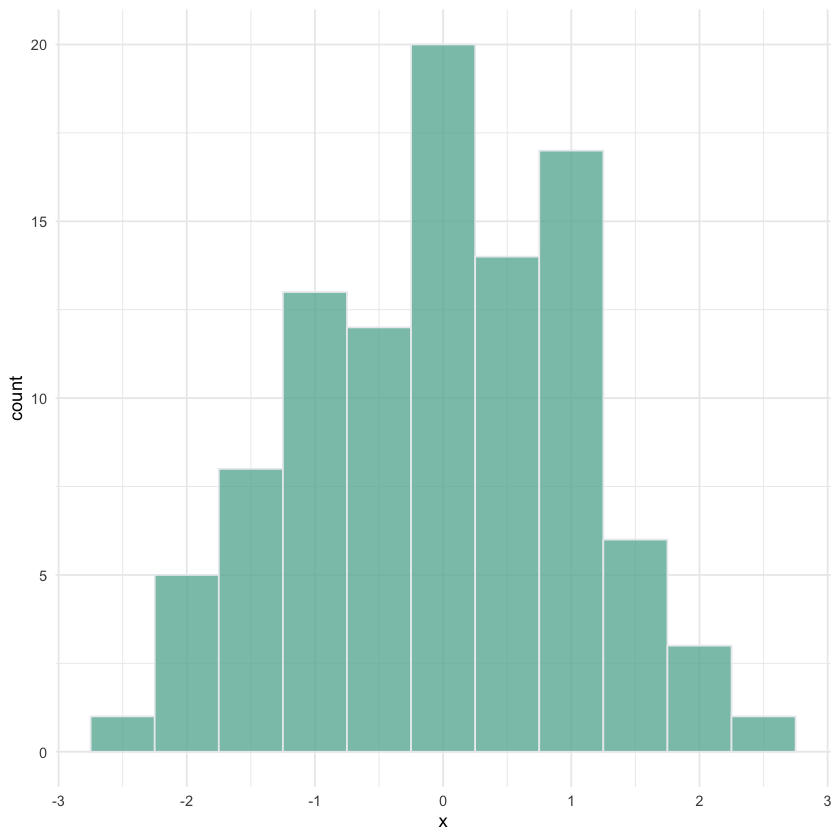

In [59]:
g <- ggplot(data.frame(x = x), aes(x = x)) +
     geom_histogram(binwidth = 0.5, fill="#69b3a2", color="#e9ecef", alpha=0.8) +
     theme_minimal()
g

(b) Using the `rnorm()` function, create a vector, `eps`, containing 100 observations drawn from a $N(0,0.25)$ distribution—a normal distribution with mean zero and variance 0.25.

In [60]:
eps <- rnorm(100, mean = 0, sd = 0.25)

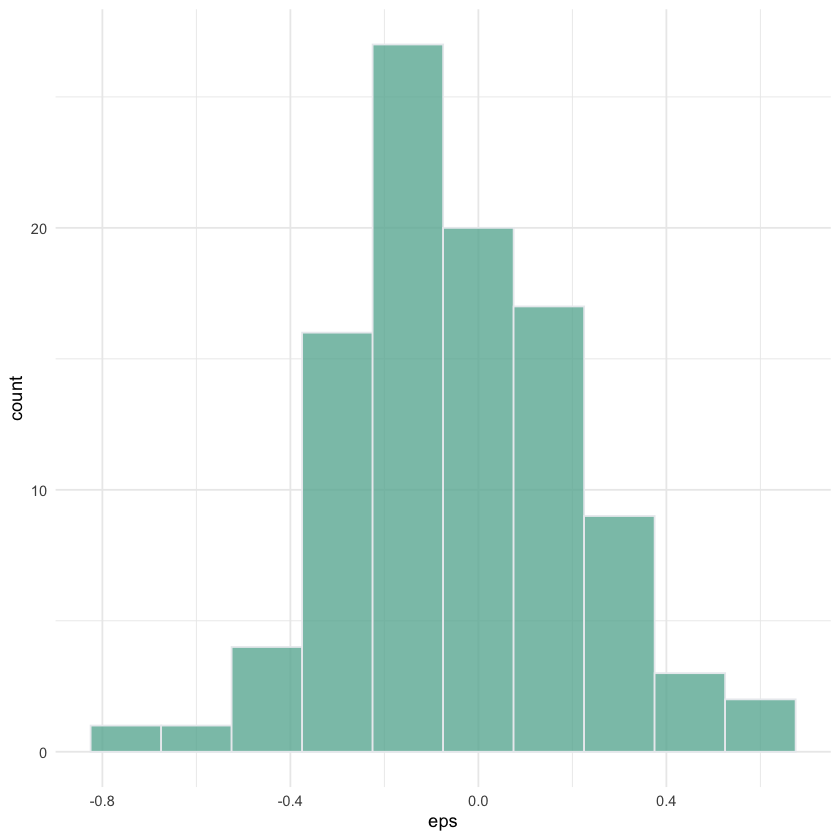

In [65]:
g1 <- ggplot(data.frame(eps = eps), aes(x = eps)) +
    geom_histogram(binwidth = 0.15, fill = "#69b3a2", color = "#e9ecef", alpha = 0.8) +
    theme_minimal()
g1

(c) Using `x` and `eps`, generate a vector `y` according to the model: $y = -1 + 0.5 x + \epsilon$.

What is the length of the vector `y`? What are the values of $\beta_0$ and $\beta_1$ in this linear model?

In [66]:
y <- -1 + 0.5*x + eps

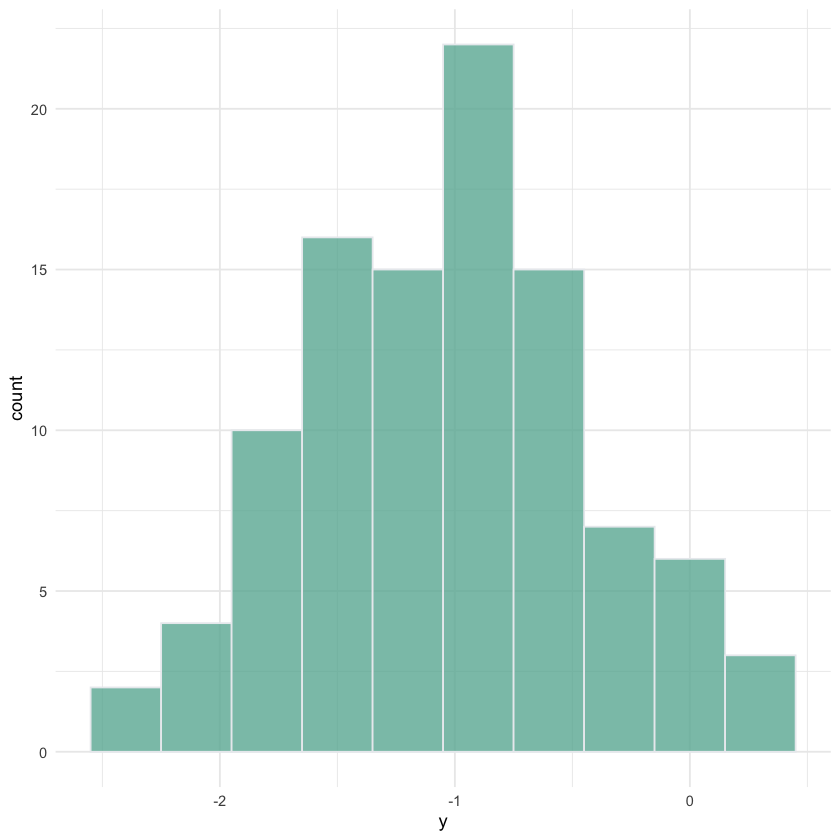

In [70]:
g2 <- ggplot(data.frame(y = y), aes(x = y)) +
    geom_histogram(binwidth = 0.3, fill = "#69b3a2", color = "#e9ecef", alpha = 0.8) +
    theme_minimal()
g2

In [14]:
length(y)

[1] 100

$\beta_0 = -1$

$\beta_1 = 0.5$

(d) Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.

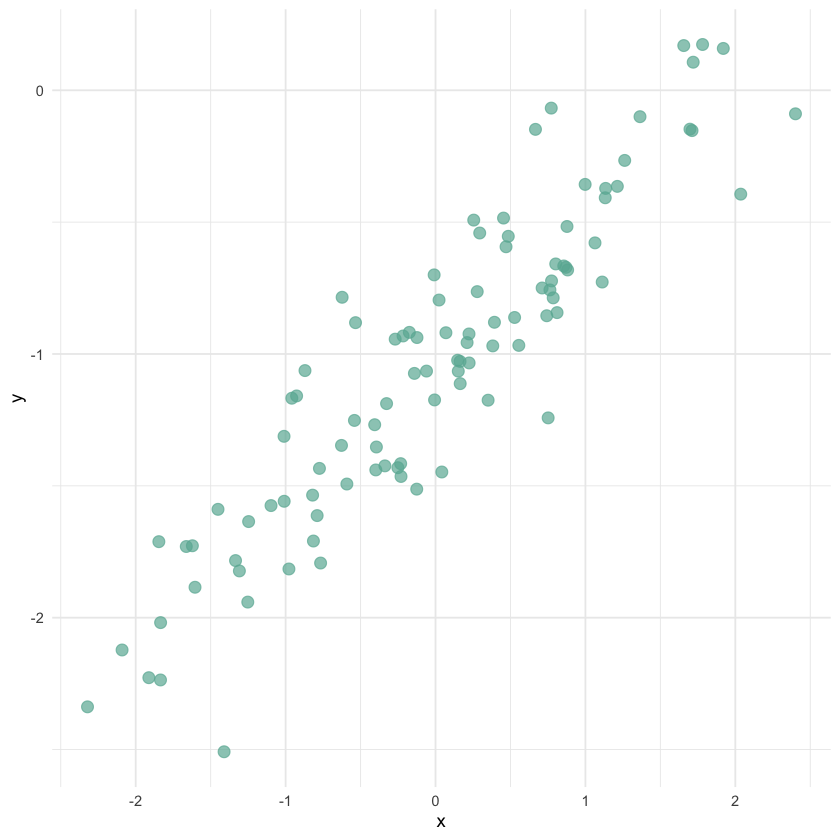

In [79]:
g3 <- ggplot(data.frame(x = x, y = y), aes(x, y)) +
      geom_point(color = "#69b3a2", alpha = 0.7, size = 3) +
      theme_minimal()
g3

There is a positive linear relation between `y` and `x`. The center or mean of the plot seems located at the point $(x = 0, y = -1)$.

(e) Fit a least squares linear model to predict `y` using `x`. 

Comment on the model obtained. How do $\hat{\beta}_0$ and $\hat{\beta}_1$ compare to $\beta_0$ and $\beta_1$?

In [77]:
lm.fit <- lm(y ~ x)
summary(lm.fit)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72557 -0.14671 -0.01403  0.18302  0.58192 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.03769    0.02461  -42.17   <2e-16 ***
x            0.52839    0.02402   22.00   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2461 on 98 degrees of freedom
Multiple R-squared:  0.8316,	Adjusted R-squared:  0.8299 
F-statistic:   484 on 1 and 98 DF,  p-value: < 2.2e-16


The coefficient estimates are $\hat{\beta}_0 = -1.04$ and $\hat{\beta}_1 = 0.53$. Compared to the -1 and 0.5, the estimates are very close in value. This means that the characterization of the least square relation between `y` and `x` seems correct.

(f) Display the least squares line on the scatterplot obtained in (d). 
Draw the population regression line on the plot, in a different color. 
Use the `legend()` command to create an appropriate legend.

`geom_smooth()` using formula 'y ~ x'



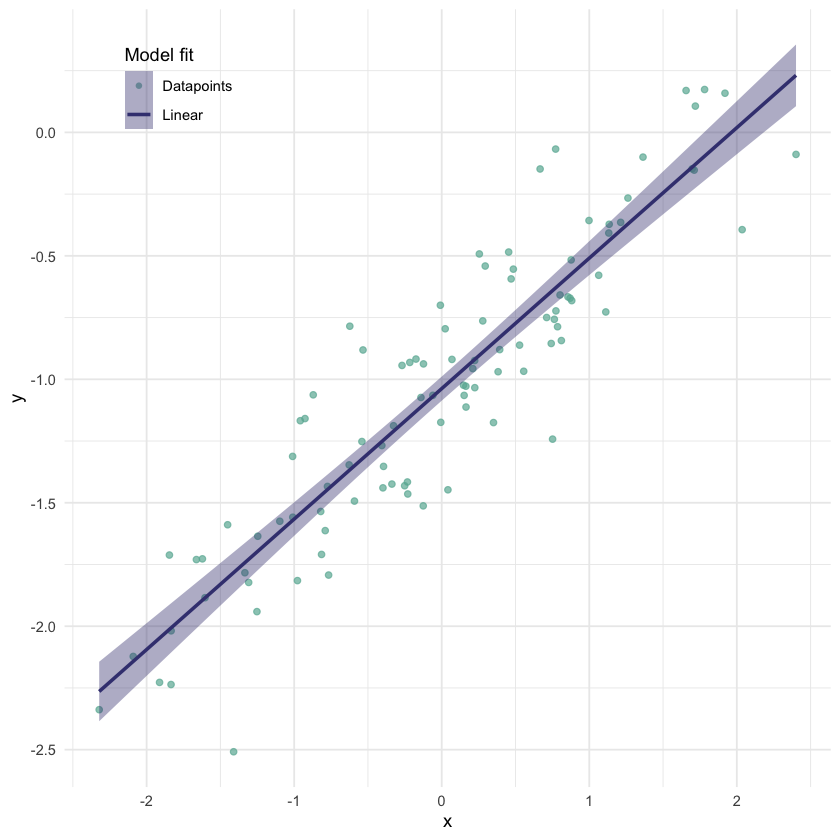

In [124]:
g4 <- ggplot(data.frame(x = x, y = y), aes(x, y)) +
    geom_point(alpha = 0.7, aes(color = "#69b3a2")) +
    theme_minimal() +
    geom_smooth(method = lm, fill = "#404080", aes(color = "#404080")) +
    scale_color_identity(
        name = "Model fit",
        breaks = c("#69b3a2", "#404080"),
        labels = c("Datapoints", "Linear"),
        guide = guide_legend(override.aes = list(linetype = c(0, 1), shape = c(16, NA)))
    ) +
    theme(legend.position = c(.15, .9))
g4

(g) Now fit a polynomial regression model that predicts `y` using `x` and `x^2`. 
Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [127]:
lm.fit2 <- lm(y ~ x + I(x^2))
summary(lm.fit2)


Call:
lm(formula = y ~ x + I(x^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72009 -0.15128 -0.00837  0.19200  0.57717 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.03069    0.03198 -32.226   <2e-16 ***
x            0.52783    0.02418  21.829   <2e-16 ***
I(x^2)      -0.00667    0.01935  -0.345    0.731    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2472 on 97 degrees of freedom
Multiple R-squared:  0.8318,	Adjusted R-squared:  0.8284 
F-statistic: 239.9 on 2 and 97 DF,  p-value: < 2.2e-16
